In [88]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [45]:
# Load data
file_path = "GCB2022v27_MtCO2_flat.csv"
df_emission = pd.read_csv(file_path)
df_emission.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,1755,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,1756,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,1757,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,1758,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,1759,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Top 3 Polluters in 2021 and Percentage of Emission

In [46]:
#Filter df_emission (MtCo2) by year 2021 
df_emission21 = df_emission.loc[(df_emission['Year'] == 2021)]
df_emission21.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
271,Afghanistan,AFG,2021,11.874211,4.203536,7.419570,0.238847,0.012259,0.000000,NaN,0.296119
543,Albania,ALB,2021,4.619109,0.174413,3.246273,0.150245,1.048179,0.000000,NaN,1.618066
815,Algeria,DZA,2021,176.269070,1.095536,56.020598,92.791955,11.028039,15.332942,NaN,3.989977
1087,Andorra,AND,2021,0.452888,0.000000,0.452888,0.000000,0.000000,0.000000,NaN,5.730292
1359,Angola,AGO,2021,21.362717,0.000000,13.901716,2.951298,1.123730,3.385974,NaN,0.619141
1631,Anguilla,AIA,2021,0.144744,0.000000,0.144744,0.000000,0.000000,0.000000,NaN,9.188354
1903,Antarctica,ATA,2021,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2175,Antigua and Barbuda,ATG,2021,0.468695,0.000000,0.468695,0.000000,0.000000,0.000000,NaN,5.027895
2447,Argentina,ARG,2021,186.448284,4.816141,80.309110,94.327529,4.670734,2.324770,NaN,4.117967
2719,Armenia,ARM,2021,6.806045,0.012484,0.991559,5.460901,0.341102,0.000000,NaN,2.438591


In [47]:
#Sort by Total emmision from biggest to smallest
df_emission21 = df_emission21.sort_values(by=['Total'], ascending=False)
df_emission21.set_index('Country',inplace=True)


In [48]:
df_emission21.head()
# China, USA, and India were the biggest polluters of 2021

,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
Country,,,,,,,,,,
Global,WLD,2021,37123.850352,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746,4.693699
China,CHN,2021,11472.369171,7955.985419,1713.339980,773.866062,852.961348,4.677478,171.538883,8.045741
USA,USA,2021,5007.335889,1002.299987,2233.778180,1637.038462,41.203135,67.684371,25.331754,14.858668
India,IND,2021,2709.683625,1802.311897,622.148121,133.450811,149.001244,2.771552,NaN,1.925088
Russia,RUS,2021,1755.547390,380.227147,403.080393,875.051751,21.920821,58.921786,16.345492,12.098650


In [56]:
#Percentage of Countries emission in 2021
df_emission21['Percentage_CO2_Emission'] = (df_emission21['Total']/(df_emission21.loc['Global']['Total']))*100
df_emission21.head(10)
# Top 3 polluters emits globaly: China (30.9%), USA (13.5%), India (7.3%)

,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Percentage_CO2_Emission
Country,,,,,,,,,,,
Global,WLD,2021,37123.850352,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746,4.693699,100.000000
China,CHN,2021,11472.369171,7955.985419,1713.339980,773.866062,852.961348,4.677478,171.538883,8.045741,30.902961
USA,USA,2021,5007.335889,1002.299987,2233.778180,1637.038462,41.203135,67.684371,25.331754,14.858668,13.488191
India,IND,2021,2709.683625,1802.311897,622.148121,133.450811,149.001244,2.771552,NaN,1.925088,7.299037
Russia,RUS,2021,1755.547390,380.227147,403.080393,875.051751,21.920821,58.921786,16.345492,12.098650,4.728894
Japan,JPN,2021,1067.398435,418.820499,395.359389,221.525076,23.788868,0.344529,7.560075,8.565739,2.875236
International Transport,XIT,2021,1021.749204,NaN,1021.749204,NaN,NaN,NaN,NaN,NaN,2.752272
Iran,IRN,2021,748.878752,3.729952,222.961835,466.993766,22.524908,32.668290,NaN,8.517397,2.017244
Germany,DEU,2021,674.753566,230.221049,248.200624,173.484052,13.233969,1.807425,7.806447,8.089741,1.817574


In [57]:
#Top 3 combine in %
(df_emission21.loc['China']['Percentage_CO2_Emission'])+(df_emission21.loc['USA']['Percentage_CO2_Emission'])+(df_emission21.loc['India']['Percentage_CO2_Emission'])
#Top 3 countries emitted 51.7% of all global CO2 in 2021

51.69018973800005

In [58]:
#Top 3 combine in MtCO2
(df_emission21.loc['China']['Total'])+(df_emission21.loc['USA']['Total'])+(df_emission21.loc['India']['Total'])
#Top 3 countries emitted 19189 Metric Tons of all global CO2 in 2021

19189.388685

# Emission Trend 1750-2021

In [59]:
df_emission.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,AFG,1755,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,AFG,1756,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,AFG,1757,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Afghanistan,AFG,1758,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,AFG,1759,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
#Filter df_emission (MtCo2) by Global
df_emissionGlobal = df_emission.loc[(df_emission['Country'] == "Global")]
df_emissionGlobal.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62832,Global,WLD,1750,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011492
62833,Global,WLD,1751,9.350528,9.350528,NaN,NaN,NaN,NaN,NaN,0.011438
62834,Global,WLD,1752,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011390
62835,Global,WLD,1753,9.354192,9.354192,NaN,NaN,NaN,NaN,NaN,0.011339
62836,Global,WLD,1754,9.357856,9.357856,NaN,NaN,NaN,NaN,NaN,0.011294
62837,Global,WLD,1755,9.361520,9.361520,NaN,NaN,NaN,NaN,NaN,0.011249
62838,Global,WLD,1756,10.006384,10.006384,NaN,NaN,NaN,NaN,NaN,0.011973
62839,Global,WLD,1757,10.010048,10.010048,NaN,NaN,NaN,NaN,NaN,0.011927
62840,Global,WLD,1758,10.013712,10.013712,NaN,NaN,NaN,NaN,NaN,0.011881
62841,Global,WLD,1759,10.017376,10.017376,NaN,NaN,NaN,NaN,NaN,0.011837


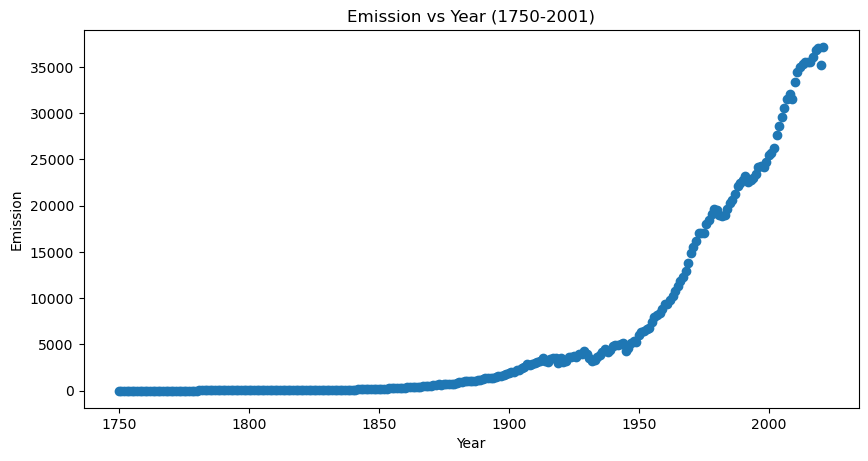

In [82]:
# Do a scatter plot for all years (1750-2001)
plt.scatter(df_emissionGlobal.Year,df_emissionGlobal.Total)
plt.xlabel('Year')
plt.ylabel('Emission')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Emission vs Year (1750-2001)')
plt.show()
# Graph show an exponential gowth of MtCO2 emission. The major intial uptick started in 1900s.

# Emission Trend 1900-2021

In [86]:
#Filter df_emissionGlobal for 1900-2021
df_Global1900_2021 = df_emissionGlobal.loc[df_emissionGlobal['Year'] > 1899]
df_Global1900_2021.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
62982,Global,WLD,1900,1952.209498,1873.356867,67.309637,11.541600,0.001395,NaN,NaN,1.179988
62983,Global,WLD,1901,2016.744495,1929.131922,74.750267,12.860640,0.001666,NaN,NaN,1.211361
62984,Global,WLD,1902,2067.683966,1973.177627,80.808149,13.696032,0.002158,NaN,NaN,1.233733
62985,Global,WLD,1903,2254.094927,2154.002798,85.561821,14.527760,0.002548,NaN,NaN,1.335657
62986,Global,WLD,1904,2279.748708,2166.663609,96.083367,15.165234,0.002749,NaN,NaN,1.341202
62987,Global,WLD,1905,2427.313197,2311.142921,97.016809,17.169504,0.003512,NaN,NaN,1.417569
62988,Global,WLD,1906,2534.734414,2415.682993,97.892621,19.027152,0.004497,NaN,NaN,1.469314
62989,Global,WLD,1907,2888.307767,2746.956153,119.416045,19.877139,0.004630,NaN,NaN,1.661760
62990,Global,WLD,1908,2776.404367,2626.020205,128.759327,19.675680,0.115405,NaN,NaN,1.585453
62991,Global,WLD,1909,2890.468087,2730.133645,134.348724,23.522878,0.115641,NaN,NaN,1.638373


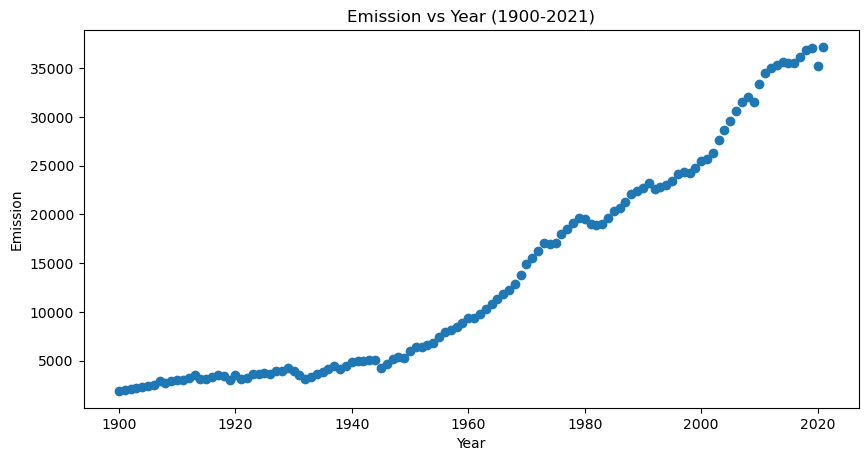

In [87]:
# Do a scatter plot from (1900-2001)
plt.scatter(df_Global1900_2021.Year,df_Global1900_2021.Total)
plt.xlabel('Year')
plt.ylabel('Emission')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Emission vs Year (1900-2021)')
plt.show()
# Graph shows more a linear growth than an exponential growth. Lets do a linear regression. 

In [98]:
# Linear Regression
X = df_Global1900_2021.Year.values.reshape(-1, 1)
X.shape

(122, 1)

In [99]:
y = df_Global1900_2021.Total
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(122,)


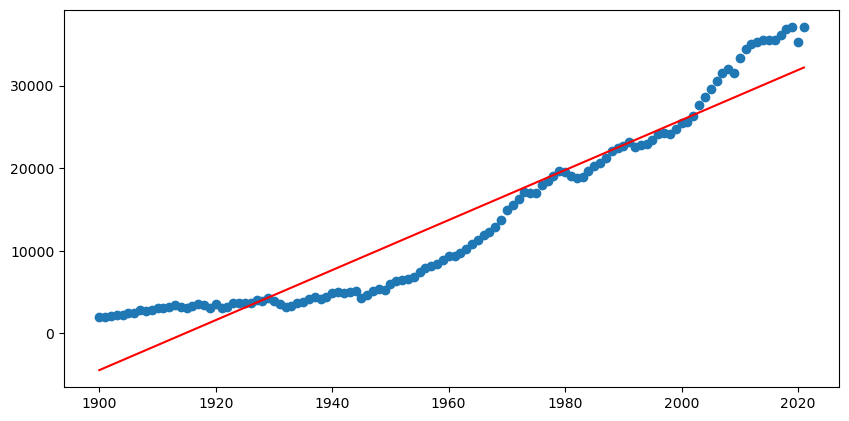

In [100]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [101]:
print(model.coef_)
print(model.intercept_)

[302.90235922]
-579954.3288697449


In [103]:
from sklearn.metrics import r2_score
r2_score(y,y_pred)
# R2 is 90.7% accurate. This means y=302.902x-579954.3 have an accuracy of 90.7%.

0.906808690645524

In [ ]:
#Add this linear prediction model to our dataframe df_Global1900_2021
df_Global1900_2021['Linear_Prediction_Model'] = (302.902*(df_Global1900_2021.loc[:,'Year'])-579954.3)


In [115]:
df_Global1900_2021 = df_Global1900_2021.sort_values(by=['Year'], ascending=False)
df_Global1900_2021.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Linear_Prediction_Model
63103,Global,WLD,2021,37123.850352,14979.598083,11837.159116,7921.829472,1672.592372,416.525563,296.145746,4.693699,32210.642
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423,31907.740
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633,31604.838
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753,31301.936
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682,30999.034


In [132]:
#Creat a year dataframe going from 2021-2100
Years = np.arange(2021,2101).tolist()
Year_df = pd.DataFrame(Years, columns=['Year'])
Year_df

,Year
0,2021
1,2022
2,2023
3,2024
4,2025
...,...
75,2096
76,2097
77,2098
78,2099


In [142]:
# Linear module prediction
Year_df['Linear_Prediction_Model_1900-2021'] = (302.902*(Year_df['Year'])-579954.3)
Year_df.sort_values(by=['Year'], ascending=False)
# According to this linear regression we will reach 56139.9mtCO2 in 2100 (more than a 50% increase from current levels)

,Year,Linear_Prediction_Model,Linear_Prediction_Model_1900-2021
79,2100,56139.900,56139.900
78,2099,55836.998,55836.998
77,2098,55534.096,55534.096
76,2097,55231.194,55231.194
75,2096,54928.292,54928.292
...,...,...,...
4,2025,33422.250,33422.250
3,2024,33119.348,33119.348
2,2023,32816.446,32816.446
1,2022,32513.544,32513.544


# Emission Trend 2000-2021

In [135]:
# lets focus on the last 20 years
df_Global2000_2021 = df_emissionGlobal.loc[df_emissionGlobal['Year'] > 1999]
df_Global2000_2021.head(10)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
63082,Global,WLD,2000,25453.622139,9203.117603,10302.090594,4731.291034,721.927315,278.928472,216.267121,4.139541
63083,Global,WLD,2001,25668.048326,9255.256797,10390.668975,4773.584851,754.331663,281.128017,213.078023,4.119578
63084,Global,WLD,2002,26281.037468,9678.959137,10385.864180,4905.853640,796.052479,298.553835,215.754196,4.163394
63085,Global,WLD,2003,27651.596453,10518.463642,10679.654448,5081.468111,852.252693,299.375515,220.382043,4.324685
63086,Global,WLD,2004,28636.695037,10871.584335,11042.504634,5257.190057,910.566319,323.802545,231.047147,4.422142
63087,Global,WLD,2005,29614.602256,11543.334878,11139.399176,5380.665522,964.306101,345.094230,241.802350,4.515677
63088,Global,WLD,2006,30593.116788,12188.840276,11246.321550,5506.809201,1051.668722,346.860142,252.616896,4.606415
63089,Global,WLD,2007,31506.789200,12776.360246,11283.665343,5694.133805,1129.389392,363.985324,259.255090,4.684364
63090,Global,WLD,2008,32085.836322,13192.796643,11251.325081,5864.291234,1143.738362,374.074157,259.610844,4.710472
63091,Global,WLD,2009,31564.030692,13016.427997,10996.948677,5751.954007,1175.729621,379.401924,243.568467,4.575621


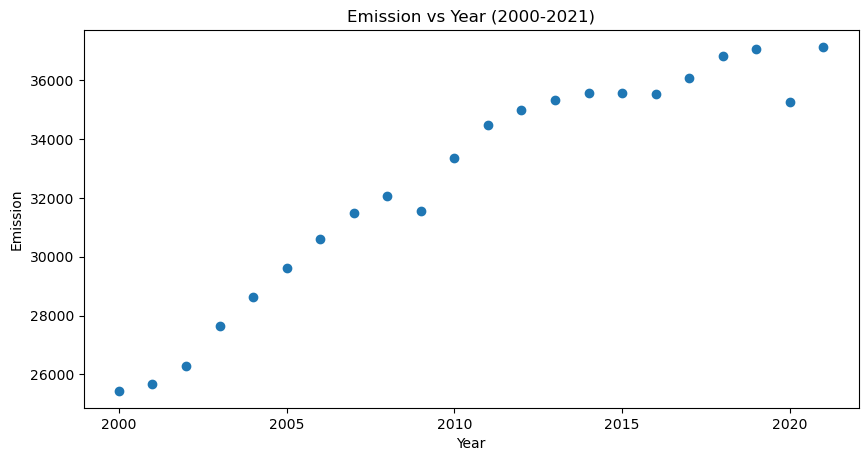

In [136]:
# Do a scatter plot from (1900-2001)
plt.scatter(df_Global2000_2021.Year,df_Global2000_2021.Total)
plt.xlabel('Year')
plt.ylabel('Emission')
plt.rcParams.update({'figure.figsize':(10,5), 'figure.dpi':100})
plt.title('Emission vs Year (2000-2021)')
plt.show()
# Graph shows more a linear growth. however it does appear less agressive growth than the previous scatter plot from 1900-2021.
# This might signal a plateau

In [137]:
# Linear Regression for 2000-2021
X = df_Global2000_2021.Year.values.reshape(-1, 1)
X.shape

(22, 1)

In [138]:
y = df_Global2000_2021.Total
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print(y_pred.shape)

(22,)


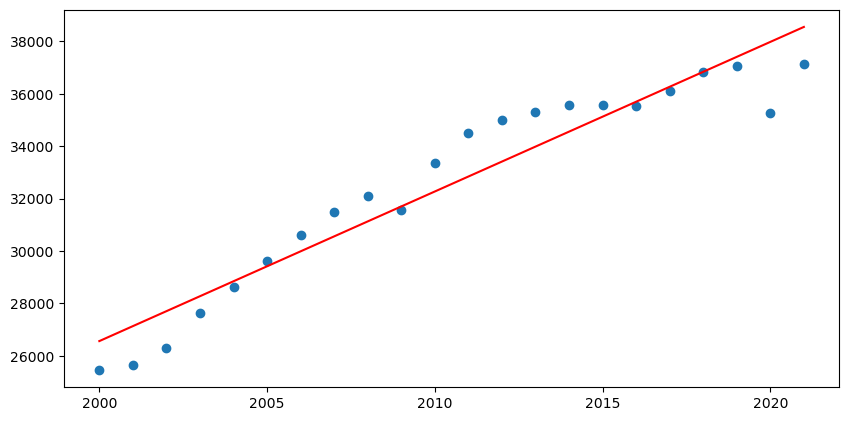

In [139]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [140]:
print(model.coef_)
print(model.intercept_)

[571.10985794]
-1115657.904084031


In [141]:
r2_score(y,y_pred)
# R2 is 91.4% accurate. This means y=571.11x-1115657.9 have an accuracy of 91.4%. 

0.9142004678657292

In [143]:
# Lets add it to our data frame for year to see the difference between both predictions
Year_df['Linear_Prediction_Model_2000-2021'] = (571.11*(Year_df['Year'])-1115657.9)
Year_df.sort_values(by=['Year'], ascending=False)

,Year,Linear_Prediction_Model,Linear_Prediction_Model_1900-2021,Linear_Prediction_Model_2000-2021
79,2100,56139.900,56139.900,83673.10
78,2099,55836.998,55836.998,83101.99
77,2098,55534.096,55534.096,82530.88
76,2097,55231.194,55231.194,81959.77
75,2096,54928.292,54928.292,81388.66
...,...,...,...,...
4,2025,33422.250,33422.250,40839.85
3,2024,33119.348,33119.348,40268.74
2,2023,32816.446,32816.446,39697.63
1,2022,32513.544,32513.544,39126.52


The prediction from the 2000-2021 model is more than 50% than that of the 1900-2021 model in 2100. Both are accurate in term of their R2. However the predictions are not close. This shows that the linear regression model will not properly predict our metric tons emissions globally for 2022 and above. This shows that there is no contant growth rate and it does change from year to year.